https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/
https://www.kaggle.com/futurist/mapping-of-earthquake-and-its-analysis

This code is deprecated because the dependency for Basemap is hard to install.

In [1]:
# requires pandas to open csv

# Naive Bayes Algorithm: 
import pandas
import csv
import random
#import numpy as np


with open('asia-data.csv', 'r') as csvfile:
    lines = csv.reader(csvfile)
    for row in lines:
        print(', '.join(row))

ï»¿hour, latitude, longitude, mag
19, 18.5882, 145.6762, 4.5
15, 36.5934, 70.8676, 4.3
15, 33.186, 137.9266, 4.9
15, 23.9818, 121.586, 5.1
14, 36.0441, 70.1732, 4.2
14, 46.8235, 152.9599, 4.8
10, 48.4533, 154.8797, 4.5
5, 9.4648, 123.1508, 4.5
23, 36.4753, 70.4965, 4.2
8, 54.9147, 111.7183, 4.6
4, 58.7474, 158.9228, 4.6
1, 37.0996, 141.2942, 5
23, 36.3213, 141.8009, 4.5
22, 43.8744, 86.5553, 4.6
8, 19.4562, 144.5374, 4.7
15, 38.5537, 70.5724, 5
13, 9.4638, 126.36, 4.6
12, 36.2949, 141.9999, 4.5
5, 40.3011, 77.6325, 4.6
4, 23.7431, 63.9563, 4.3
16, 36.6966, 71.0477, 4.1
15, 34.3875, 70.49, 4.2
14, 19.5466, 144.5567, 5.1
6, 34.5506, 140.1244, 4.7
19, 39.1276, 142.3716, 4.7
8, 40.8987, 141.3748, 4.6
21, 36.6706, 70.8862, 4.3
14, 41.104, 143.3093, 4.3
13, 30.0593, 70.3816, 4.1
4, 39.7671, 74.4116, 4.2
22, 44.3444, 140.9769, 4.2
19, 45.02, 147.6023, 4.3
15, 27.9852, 92.5815, 4.8
8, 36.1883, 70.4385, 4.7
2, 36.5512, 70.5232, 4.3
3, 23.5476, 94.32, 4.5
0, 41.4349, 143.1458, 4.4
17, 27.4987, 1

21, 12.2809, 122.0142, 4.4
17, 23.9454, 121.5262, 4.1
16, 36.4646, 70.6684, 4.1
13, 9.375, 125.5524, 4.5
12, 32.5095, 137.862, 4
10, 11.6819, 143.2613, 5.1
10, 17.1776, 145.8008, 4.7
1, 36.4765, 70.9889, 4.4
20, 29.3688, 68.2701, 4
13, 28.7329, 69.3073, 4.7
7, 45.2293, 149.9925, 4.5
1, 22.8561, 121.2823, 4.6
21, 42.7239, 144.1293, 4.4
20, 24.8803, 141.2644, 4.3
13, 36.536, 70.8913, 4.3
10, 18.0054, 120.6238, 4.6
8, 24.0073, 126.1024, 4.4
3, 18.5631, 145.7122, 4.6
19, 15.7279, 146.1142, 4.6
18, 36.4564, 70.2964, 4.1
17, 28.9869, 142.4575, 4.6
12, 36.2643, 141.3093, 4.5
5, 41.9182, 144.6454, 4.4
5, 33.1489, 138.0832, 4.1
2, 12.1648, 144.4392, 4.3
1, 43.898, 147.1476, 4.3
20, 48.2736, 154.1246, 4.6
19, 32.9691, 68.5616, 4.6
17, 18.8003, 145.5784, 4.5
15, 38.3019, 141.869, 4.6
5, 23.1945, 94.6164, 4.5
2, 9.5212, 93.4269, 5.2
22, 28.483, 142.0546, 4.6
21, 44.4485, 148.1736, 4.4
17, 45.2355, 124.642, 5.3
16, 15.2608, 145.9398, 4.3
14, 10.7964, 125.416, 4.6
6, 12.5893, 145.2634, 4.6
3, 39.067

16, 48.2574, 152.8688, 4.3
16, 38.8959, 72.4571, 4.3
15, 24.9808, 96.4161, 4.4
14, 29.6604, 140.2602, 4.6
14, 29.5673, 140.5203, 4.6
13, 42.3404, 139.2428, 4.2
12, 45.4416, 124.6215, 4.3
6, 49.5054, 150.8876, 4
6, 35.5957, 140.1703, 4.4
2, 53.2848, 159.9029, 5
1, 41.9127, 143.0351, 4.3
21, 23.9454, 99.2463, 4.6
21, 29.6113, 140.5166, 5.1
21, 29.6374, 140.5205, 5.5
21, 18.3569, 145.6361, 4.3
19, 36.2279, 140.9546, 4.2
17, 30.408, 96.9096, 4.5
15, 29.5928, 140.3128, 4.3
12, 29.5489, 140.3036, 4.6
12, 29.6058, 140.4409, 4.7
12, 11.9902, 144.1082, 5.1
12, 46.1942, 152.5804, 4.3
8, 13.7992, 145.0696, 4.4
23, 29.5079, 140.5556, 4.5
23, 38.7898, 72.546, 4.5
21, 37.2882, 71.6274, 4.2
21, 37.3027, 142.0927, 4.3
19, 22.3963, 143.4685, 4.3
18, 9.2662, 125.2315, 4.5
12, 44.0175, 147.9473, 4.7
12, 49.4958, 151.436, 4
10, 35.5756, 140.0338, 4.5
2, 23.1461, 142.9983, 4.4
0, 36.522, 70.3663, 4.5
19, 22.9136, 121.2799, 4.2
14, 38.2761, 141.8955, 4.3
5, 37.0641, 71.2586, 4.5
2, 37.6336, 72.4779, 4.2
0, 

2, 31.0571, 92.7061, 4.2
2, 21.6022, 143.0447, 4.2
1, 23.2088, 121.4752, 4.5
22, 36.5105, 70.1695, 4
17, 36.568, 71.2899, 4.5
16, 18.9869, 119.8835, 4.3
15, 37.1895, 71.4173, 4.2
15, 48.4368, 152.9509, 4.2
15, 35.644, 140.6849, 4.1
13, 19.6734, 121.1205, 4.1
13, 38.6728, 70.7045, 4.3
13, 11.9674, 143.333, 4.6
10, 11.5183, 125.4737, 4.6
9, 33.4554, 103.7869, 4.1
7, 50.5453, 157.3699, 5.1
5, 35.4795, 69.2954, 4.4
0, 9.498, 124.0866, 5
0, 35.7086, 140.1416, 5.1
0, 28.3693, 130.0129, 4.3
21, 33.3453, 103.8816, 4.6
16, 23.4812, 121.5155, 4.4
15, 44.3838, 82.7029, 4.4
9, 19.5151, 147.1828, 4
5, 44.3241, 82.839, 4.7
3, 9.3421, 126.0398, 4.7
2, 33.2437, 103.807, 4.8
1, 33.4902, 103.6565, 4.4
1, 33.0548, 103.7684, 4.2
0, 44.2188, 82.893, 4.4
0, 33.2638, 103.7895, 4.8
0, 44.3734, 82.8213, 4.5
0, 33.1516, 103.9112, 4.4
23, 44.359, 82.7899, 5.3
23, 44.3249, 82.742, 5.2
23, 44.3023, 82.8317, 6.3
22, 33.2393, 103.835, 4.2
21, 33.4574, 103.9507, 4.1
21, 33.3015, 103.3728, 4
18, 27.3418, 130.9906, 4.4

8, 9.9624, 93.5567, 4.6
6, 49.8606, 159.3945, 4.5
23, 39.9551, 145.0069, 4.3
22, 31.997, 138.0681, 4
21, 16.7223, 120.5949, 4.6
18, 24.9404, 122.2982, 4
16, 28.9326, 127.9945, 4.2
15, 12.91, 95.8132, 4.4
7, 38.0789, 70.5444, 4.5
6, 26.1464, 67.8313, 4.4
1, 38.6038, 143.8869, 4.9
0, 27.3067, 65.5377, 4.6
17, 36.5563, 70.7407, 4.2
16, 18.302, 145.9579, 4.3
14, 11.1741, 92.8778, 4.8
13, 35.9705, 140.4773, 4.5
11, 38.6296, 73.1472, 4.3
6, 30.436, 130.6569, 4.9
17, 13.9269, 120.8018, 4.4
11, 42.1814, 81.2814, 4.3
6, 26.5924, 127.777, 4
18, 45.3128, 150.0919, 4.4
17, 35.9337, 141.0449, 4.4
12, 37.658, 143.7519, 4.4
11, 42.7111, 141.4285, 4.1
7, 35.837, 140.7082, 4.3
21, 40.0519, 144.9561, 4
16, 27.2997, 96.7901, 4.4
14, 13.6355, 120.8171, 4.2
12, 39.2998, 73.3558, 4.6
11, 9.7629, 125.3791, 4.7
11, 39.2516, 73.4677, 5
6, 31.6332, 141.733, 4.7
3, 42.7204, 142.6763, 4.7
20, 37.1609, 70.9706, 4
14, 17.3991, 95.9998, 5.1
8, 14.3879, 145.2126, 5.5
6, 40.2222, 143.5921, 4.6
2, 13.919, 120.6778, 4.6

11, 13.4304, 144.261, 3.8
9, 24.0138, 123.2609, 4.5
0, 24.0678, 123.3018, 4.2
23, 35.844, 141.0613, 4.1
15, 40.0954, 143.0542, 4.4
12, 18.7917, 145.5178, 4.2
9, 19.1403, 121.0172, 4.8
6, 43.2078, 146.1783, 4.5
4, 18.5193, 145.8206, 4.2
2, 33.8144, 135.42, 5.3
2, 38.8139, 70.2103, 4.2
1, 44.1844, 149.3838, 4.4
20, 16.6453, 148.6505, 4.5
15, 41.2764, 76.7588, 4.1
14, 13.795, 144.7617, 4.4
6, 36.6173, 71.3486, 4.6
1, 33.6533, 130.1074, 4.1
21, 32.6865, 96.1511, 5
19, 37.0906, 71.0939, 4.2
10, 26.0848, 125.5929, 4.8
4, 25.7955, 99.9766, 4.5
4, 25.5932, 99.8455, 4.1
3, 21.2178, 120.1539, 4.6
2, 48.9777, 85.8073, 4.1
0, 8.948, 126.3539, 4.9
22, 28.0012, 76.7017, 4.4
16, 35.595, 140.1656, 4.2
14, 29.1591, 130.5694, 4.4
14, 29.21, 130.552, 4.6
13, 29.1322, 130.5467, 4.6
4, 17.5385, 145.3821, 4.4
1, 38.977, 101.4843, 4.5
17, 37.5322, 72.2208, 4.2
16, 36.5242, 70.8421, 5.4
13, 46.8466, 150.4355, 4.3
13, 12.3798, 144.4008, 4.6
2, 24.6475, 92.3284, 4.6
16, 35.8883, 140.8529, 4.7
13, 51.4996, 156.7

20, 37.0207, 104.4475, 4.3
17, 42.1796, 112.3415, 4.1
14, 21.809, 99.8216, 4.7
10, 28.905, 138.7112, 4.2
6, 14.1248, 144.5869, 4.4
3, 38.3222, 142.1584, 4.1
22, 38.1605, 72.8734, 4.4
21, 44.8261, 149.0671, 4.9
19, 13.6763, 145.1602, 3
18, 13.9691, 120.7527, 4.4
12, 38.0609, 144.1869, 4.1
23, 39.4543, 73.3421, 4.6
20, 37.0128, 140.9196, 4.3
20, 20.5855, 121.559, 4.1
14, 36.492, 140.7576, 5.3
12, 35.9853, 69.1865, 4.5
11, 10.9467, 124.6169, 4.9
4, 21.5143, 94.5705, 4.9
4, 39.4224, 73.2913, 4
4, 24.227, 121.7906, 4.3
21, 38.3311, 75.5518, 4.4
14, 9.7313, 125.5185, 5.2
0, 30.97, 136.987, 4.4
23, 25.7955, 65.0807, 4.6
18, 14.9695, 147.4226, 4.5
16, 32.4161, 141.8303, 4.7
15, 26.5081, 128.702, 5.2
9, 40.7848, 78.3437, 4.7
6, 36.4925, 70.5276, 4.3
5, 25.5618, 123.7147, 4.2
3, 36.6938, 71.3329, 4.4
23, 14.9748, 96.4342, 5
18, 46.0617, 150.7864, 5.2
15, 12.7303, 93.3143, 4.4
4, 11.9725, 121.6633, 4.5
2, 42.9362, 143.2121, 4.8
1, 20.6767, 121.3611, 4.7
0, 35.5716, 140.2556, 4.5
21, 10.1958, 123.

17, 33.0573, 131.183, 4.2
17, 32.7415, 130.7325, 4.6
16, 32.7568, 130.7758, 4.1
16, 32.9241, 130.8091, 5.7
16, 32.7091, 130.7194, 5.3
16, 32.6976, 130.8055, 5.2
16, 32.6729, 130.7928, 4.8
16, 32.7665, 130.8229, 5.3
16, 32.8598, 131.8011, 5.1
16, 32.7906, 130.7543, 7
15, 51.3215, 90.0108, 4.8
12, 36.4241, 71.2923, 4.4
10, 18.5315, 145.7314, 4.6
8, 36.1748, 70.1956, 4.4
6, 32.8657, 130.7484, 4.4
4, 32.8197, 130.6781, 4.2
22, 32.7627, 130.7115, 4.5
22, 32.8511, 130.7839, 4.6
20, 32.7456, 130.7048, 4.7
18, 36.2105, 141.7041, 4.6
17, 32.7113, 130.6768, 4.5
16, 32.6909, 130.7685, 4.6
15, 32.7422, 130.7298, 4.5
15, 32.7017, 130.7679, 4.7
15, 34.1568, 138.2967, 4.5
15, 32.716, 130.6904, 5.3
15, 32.6973, 130.7204, 6
14, 32.7805, 130.7516, 4.9
14, 32.7574, 130.8119, 4.5
14, 32.7911, 130.728, 4.4
14, 9.9591, 126.0483, 4.2
13, 32.7076, 130.6892, 4.5
13, 32.6823, 130.7151, 4.8
13, 32.6649, 130.687, 4.8
13, 32.7429, 130.8235, 5.4
13, 32.8259, 130.6901, 4.4
12, 32.5394, 130.6376, 4.7
12, 32.788, 130.

22, 31.23, 129.3468, 4.4
21, 18.2603, 119.8713, 4.4
21, 38.9325, 141.8626, 4.5
15, 23.3363, 121.3406, 4.3
15, 23.3631, 121.4178, 4.3
9, 51.9416, 151.7448, 4.4
22, 10.4149, 125.3928, 4.1
22, 29.6312, 95.7458, 4.3
19, 38.6971, 73.1944, 4.1
18, 16.5748, 119.72, 4.9
10, 38.7195, 73.1913, 4.4
5, 18.8728, 145.5968, 4.4
3, 41.7644, 72.7169, 4.2
0, 36.5115, 70.2848, 4.1
21, 32.01, 104.51, 4
18, 39.6011, 142.4926, 4.2
14, 44.6295, 100.48, 4.5
12, 30.0927, 141.4724, 4.3
8, 36.5008, 70.3172, 4.3
0, 38.7816, 73.0963, 4.4
19, 38.3722, 72.8574, 5
12, 10.4689, 93.9392, 4.5
9, 28.2042, 140.913, 4.5
5, 46.4411, 152.2161, 4.7
3, 38.7287, 142.1513, 4.4
3, 38.7284, 142.2476, 4.4
0, 26.2802, 142.8076, 4.5
21, 43.2262, 147.0164, 4.2
19, 18.8274, 145.5691, 4.7
18, 53.6732, 98.7241, 4.1
17, 44.2906, 147.7421, 4.2
16, 38.3602, 72.4245, 4.4
14, 38.5054, 72.8567, 4.6
10, 38.7568, 73.2647, 4.4
9, 38.2448, 72.9329, 4.6
9, 30.965, 130.4075, 4.7
6, 38.7287, 142.2404, 4.2
5, 17.2199, 147.5667, 4.9
4, 45.7132, 147.133

In [2]:
def loadCsv(filename):
    lines = csv.reader(open(filename, "rb"))
    dataset = list(lines)
    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in dataset[i]]
    return dataset

In [3]:
# deprecated
def loadDatasetOld(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'r') as csvfile:
        colnames = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22']
        data = pandas.read_csv(filename, names=colnames)
        dataset = list(zip(data['2'], data['3'], data['5']))
        for x in range(len(dataset)):
            dataset[x] = list(dataset[x])        
        for x in range(len(dataset)):
            for y in range(3):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])
                
#trainingSet=[]
#testSet=[]
#loadDataset(r'earthquakes-asia.csv', 0.66, trainingSet, testSet)
#print('Train: ' + repr(len(trainingSet)))
#print('Test: ' + repr(len(testSet)))

In [4]:
def loadDataset(filename, split, trainingSet):
    with open(filename, 'r') as csvfile:
        colnames = ['1', '2', '3', '4']
        data = pandas.read_csv(filename, names=colnames)
        dataset = list(zip(data['2'], data['3'], data['4']))
        for x in range(len(dataset)):
            dataset[x] = list(dataset[x])        
            for x in range(len(dataset)):
                for y in range(3):
                    dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])

In [5]:
# attempted solution for lat/long to float found in earthquake kaggle
#m = Basemap(time='2018-08-28T22:35:13.410Z', Latitude_1= "-80", Latitude_2="80", Longitude_1="-180", Longitude_2="-80", Magnitude='5.0', urcrnrlon=180, lat_ts=20, resolution='c')
#earth_labels = earth_quake[["Location" ,"Latitude" ,"Longitude" , "Magnitude"]]
#Latitudes = earth_labels["Latitude"].tolist()
#Longitudes = earth_labels["Longitudes"].tolist()
#x,y = m(Latitudes, Longitudes) 

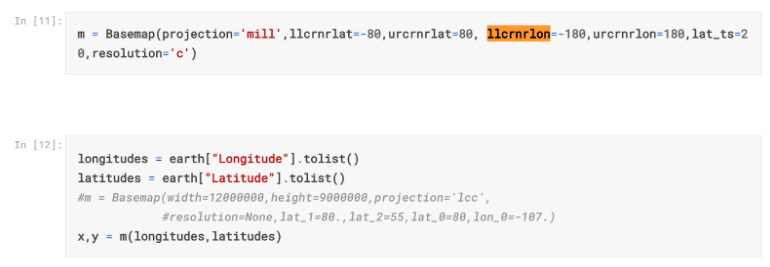

In [6]:
trainingSet = []
testSet = []
#loadDataset('asia-data.csv', 0.66, trainingSet)
print('Train: ' + repr(len(trainingSet)))
print('Test: ' + repr(len(testSet)))

Train: 0
Test: 0


In [7]:
# deprecated
def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]

#dataset = [[1], [2], [3], [4], [5]]
#splitRatio = 0.67
#train, test = splitDataset(dataset, splitRatio)
#print('Split {0} rows into train with {1} and test with {2}').format(len(dataset), train, test)

In [8]:
def separateByClass(csv="asia-data.csv"):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated

In [9]:
def mean(numbers):
    return sum(numbers) / float(len(numbers))

In [10]:
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x - avg, 2) for x in numbers]) / float(len(numbers) - 1)
    return math.sqrt(variance)